In [40]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import random

In [4]:
# def generate_real():
#     real_data = torch.FloatTensor([1, 0, 1, 0])
#     return real_data

def generate_real():
    real_data = torch.FloatTensor(
        [random.uniform(0.8, 1.0),
        random.uniform(0.0, 0.2),
        random.uniform(0.8, 1.0),
        random.uniform(0.0, 0.2),]
    )
    return real_data

generate_real()

tensor([0.8680, 0.0782, 0.9934, 0.0880])

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )

        self.loss_function = nn.MSELoss()

        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []

        pass

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, inputs, targets):
        outputs = self.forward(inputs)

        loss = self.loss_function(outputs, targets)
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim = (0, 1.0), figsize=(16, 8), alpha=0.1, marker = '.', grid=True, yticks = (0, 0.25, 0.5))
        pass

In [7]:
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

In [12]:
D = Discriminator()

for i in range(10000):
    D.train(generate_real(),torch.FloatTensor([1.0]))
    D.train(generate_random(4), torch.FloatTensor([0.0]))
    pass

counter =  10000
counter =  20000


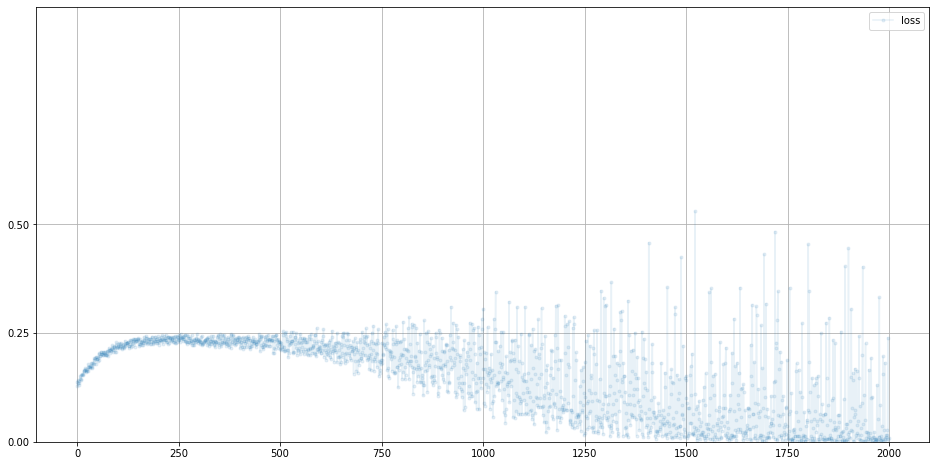

In [13]:
D.plot_progress()

In [31]:
print(D.forward(generate_real()).item())
print(D.forward(generate_random(4)).item())

0.835952877998352
0.17778322100639343


In [32]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.Sigmoid(),
            nn.Linear(3, 4),
            nn.Sigmoid()
        )

        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []

        pass

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)

        d_output = D.forward(g_output)

        loss = D.loss_function(d_output, targets)

        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim = (0, 1.0), figsize=(16, 8), alpha=0.1, marker = '.', grid=True, yticks = (0, 0.25, 0.5))
        pass
    

In [33]:
G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([0.5617, 0.3563, 0.5106, 0.3086], grad_fn=<SigmoidBackward0>)

In [42]:
D = Discriminator()
G = Generator()
image_list =[]

for i in range(10000):
    D.train(generate_real(), torch.FloatTensor([1.0]))

    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))

    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))
    if (i % 1000 == 0):
        image_list.append(G.forward(torch.FloatTensor([0.5])).detach().numpy())
    pass

counter =  10000
counter =  20000


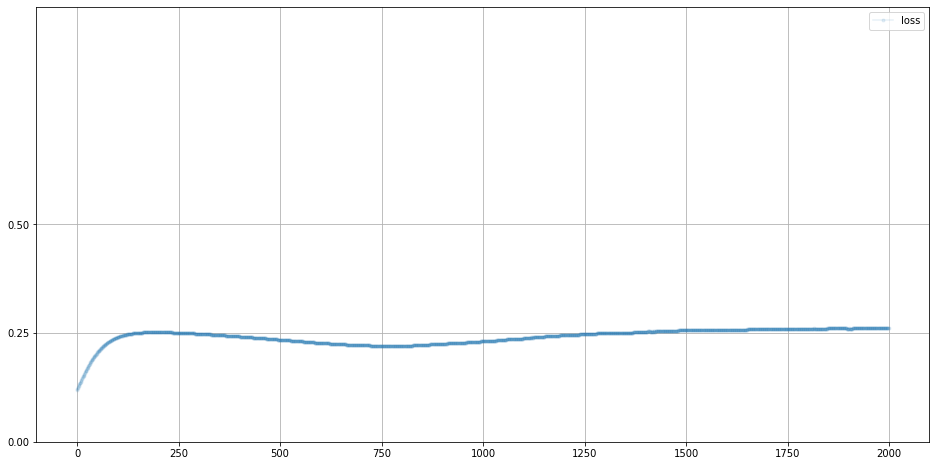

In [43]:
D.plot_progress()

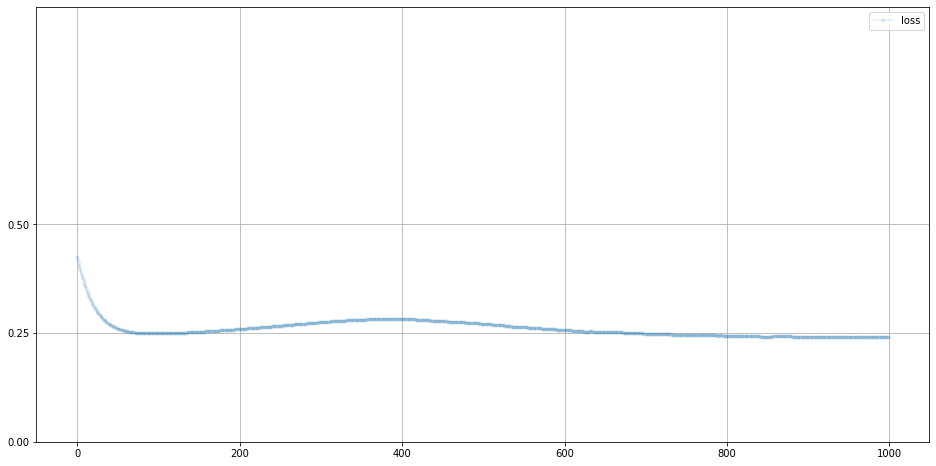

In [44]:
G.plot_progress()

In [45]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.9414, 0.0497, 0.9216, 0.0427], grad_fn=<SigmoidBackward0>)

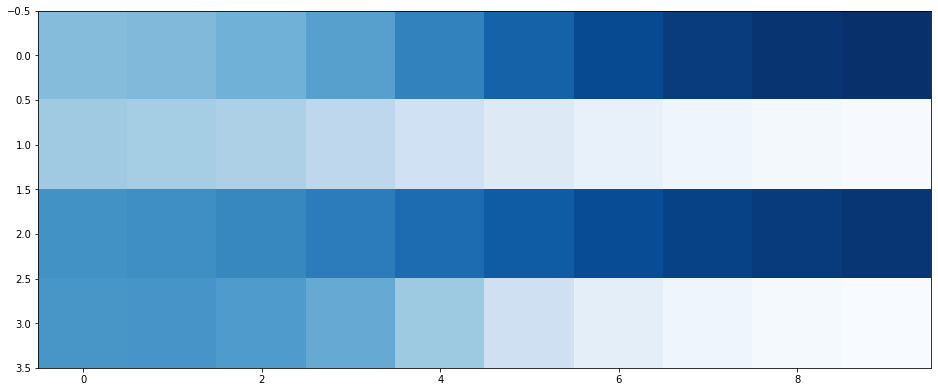

In [46]:
plt.figure(figsize=(16, 8))
plt.imshow(np.array(image_list).T, interpolation='none', cmap='Blues')